In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from plot_util import set_size, tex_fonts, LINEWIDTH_IFAC_CONF
import numpy as np
import wandb

In [7]:
mpl.style.use('default')
plt.rcParams.update(tex_fonts) # use latex fonts
plt.rcParams.update({"axes.grid": True}) 

In [8]:
api = wandb.Api()

In [9]:
runs = api.runs("forgi86/sysid-transformers-transfer", filters={"display_name": "1000_from_scratch_wh"})
run = runs[0]
history = run.scan_history()
loss_1000_from_scratch = [row["loss"] for row in history]

runs = api.runs("forgi86/sysid-transformers-transfer", filters={"display_name": "100_from_scratch_wh"})
run = runs[0]
history = run.scan_history()
loss_100_from_scratch = [row["loss"] for row in history]

runs = api.runs("forgi86/sysid-transformers-transfer", filters={"display_name": "1000_from_100"})
run = runs[0]
history = run.scan_history()
loss_1000_from_100 = [row["loss"] for row in history]


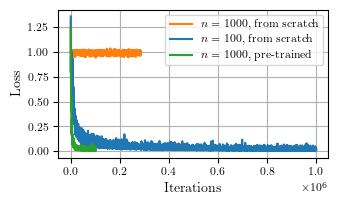

In [10]:

fig, ax = plt.subplots(1, 1, figsize=set_size(LINEWIDTH_IFAC_CONF, fraction=1.0))
ax.plot(np.arange(len(loss_1000_from_scratch))*100, loss_1000_from_scratch, color="C1", label="$n=1000$, from scratch")
ax.plot(np.arange(len(loss_100_from_scratch))*100, loss_100_from_scratch, color="C0", label="$n=100$, from scratch")
ax.plot(np.arange(len(loss_1000_from_100))*100, loss_1000_from_100, color="C2", label="$n=1000$, pre-trained")
ax.set_xlabel("Iterations")
ax.set_ylabel("Loss")
ax.legend(loc="upper right")
plt.tight_layout()
plt.savefig("wh_pretrain_iterations.pdf")
plt.savefig("wh_pretrain_iterations.png", dpi=400)